In [1]:
import numpy as np
import pandas as pd 

from pacmann import PacLinearRegression
from sklearn import datasets 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [3]:
# Using one feature

X = diabetes_X[:, np.newaxis, 2]
X_train, y_train = X[:-20], diabetes_y[:-20]
X_test, y_test = X[-20:], diabetes_y[-20:]

# Benchmark with LinearRegression from sklearn

skl_lr = LinearRegression()
pac_lr = PacLinearRegression(learning_rate=0.5)

skl_lr.fit(X_train, y_train)
pac_lr.fit(X_train, y_train)

skl_pred = skl_lr.predict(X_test)
pac_pred = pac_lr.predict(X_test)

In [4]:
# Print coefficients 

print('sklearn LinearRegression\'s Coefficient:', [skl_lr.coef_[0]] +\
                                                    [skl_lr.intercept_])
print('pacmann LinearRegression\'s Coefficient:', pac_lr.coeff_)

sklearn LinearRegression's Coefficient: [938.2378612512637, 152.91886182616167]
pacmann LinearRegression's Coefficient: [938.2265928710765, 152.91886716713094]


In [5]:
print('sklearn coefficient of determination:', r2_score(y_test, skl_pred))
print('pacmann coefficient of determination:', pac_lr.score(y_test, pac_pred))

sklearn coefficient of determination: 0.47257544798227147
pacmann coefficient of determination: 0.4725727978233437


In [6]:
sklearn_r2 = round(r2_score(y_test, skl_pred),4)
pacmann_r2 = round(pac_lr.score(y_test, pac_pred), 4)

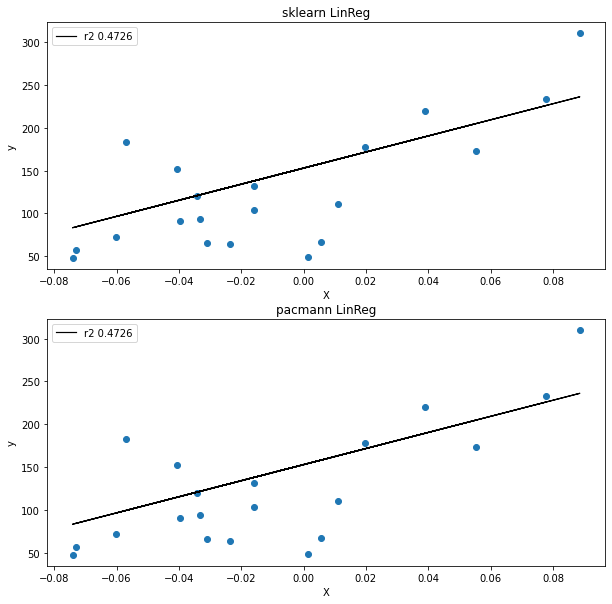

In [7]:
fig, axes = plt.subplots(2, figsize=(10,10))
axes[0].title.set_text('sklearn LinReg')
axes[0].scatter(X_test, y_test)
axes[0].plot(X_test, skl_pred, color='k', linewidth=1.2, label='r2 '+str(sklearn_r2))
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].legend()
axes[1].title.set_text('pacmann LinReg')
axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, pac_pred, color='k', linewidth=1.2, label='r2 '+str(pacmann_r2))
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].legend()
plt.show()

fig.savefig('figures/sample_linear_reg_sklearn_vs_pacmann.png', dpi=300, bbox_inches='tight')

In [8]:
# Using two or more features

n = 3 # change n to grab different number of features

X = diabetes_X[:,0:n]
X_train, y_train = X[0:422, :], diabetes_y[:-20]
X_test, y_test = X[422:, :], diabetes_y[-20:]

# Benchmark with LinearRegression from sklearn

skl_lr = LinearRegression()
pac_lr = PacLinearRegression(learning_rate=0.5)

skl_lr.fit(X_train, y_train)
pac_lr.fit(X_train, y_train)

skl_pred = skl_lr.predict(X_test)
pac_pred = pac_lr.predict(X_test)

In [9]:
# Print coefficients 

print('sklearn LinearRegression\'s Coefficient:', list(skl_lr.coef_) + \
                                                  [skl_lr.intercept_])
print('pacmann LinearRegression\'s Coefficient:', pac_lr.coeff_)

sklearn LinearRegression's Coefficient: [144.25978848249486, -33.434630422036435, 914.070009139196, 152.869177291775]
pacmann LinearRegression's Coefficient: [144.2925312509449, -33.43902910678095, 914.0347187189243, 152.86918057453636]


In [10]:
print('sklearn coefficient of determination:', r2_score(y_test, skl_pred))
print('pacmann coefficient of determination:', pac_lr.score(y_test, pac_pred))

sklearn coefficient of determination: 0.46479442520771996
pacmann coefficient of determination: 0.46478381013237136
